In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Section 1: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Section 2: Load and Preprocess the Dataset

In [4]:
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path, sep=';')
    df_cleaned = df.drop(columns=['school', 'guardian', 'Mjob', 'Fjob', 'reason'], errors='ignore')
    return df_cleaned

# Section 3: Data Exploration and Statistics

In [5]:
def explore_data(df):
    print("Basic Statistics:")
    print(df.describe(include='all'))

    print("\nDataFrame Information:")
    print(df.info())

    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    print("\nCategorical Columns:", categorical_columns)

    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

    plt.figure(figsize=(10, 5))
    sns.histplot(df['G3'], bins=20, kde=True)
    plt.title('Distribution of Final Grades (G3)')
    plt.xlabel('Final Grade (G3)')
    plt.ylabel('Frequency')
    plt.show()


# Section 4: Data Preparation

In [6]:
def prepare_data(df):
    X = df.drop(columns=['G3'])
    y = df['G3']

    X_encoded = pd.get_dummies(X, drop_first=True)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Section 5: Build the Neural Network Model

In [7]:
def build_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Section 6: Train the Model

In [8]:
def train_model(model, X_train, y_train):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=200,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )
    return history

# Section 7: Evaluate the Model

In [10]:
def evaluate_model(model, X_test, y_test, history):
    loss, mae = model.evaluate(X_test, y_test)
    print(f'Test Loss: {loss:.4f}, Test MAE: {mae:.4f}')

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title('Predicted vs Actual Final Grades')
    plt.xlabel('Actual Final Grades')
    plt.ylabel('Predicted Final Grades')
    plt.show()

# Section 8: Main Execution

In [11]:
if __name__ == "__main__":
    file_path = '/content/drive/MyDrive/student-por.csv'

In [13]:
    df = load_and_preprocess_data(file_path)

Basic Statistics:
       gender         age address famsize Pstatus        Medu        Fedu  \
count     649  649.000000     649     649     649  649.000000  649.000000   
unique      2         NaN       2       2       2         NaN         NaN   
top         F         NaN       U     GT3       T         NaN         NaN   
freq      383         NaN     452     457     569         NaN         NaN   
mean      NaN   16.744222     NaN     NaN     NaN    2.514638    2.306626   
std       NaN    1.218138     NaN     NaN     NaN    1.134552    1.099931   
min       NaN   15.000000     NaN     NaN     NaN    0.000000    0.000000   
25%       NaN   16.000000     NaN     NaN     NaN    2.000000    1.000000   
50%       NaN   17.000000     NaN     NaN     NaN    2.000000    2.000000   
75%       NaN   18.000000     NaN     NaN     NaN    4.000000    3.000000   
max       NaN   22.000000     NaN     NaN     NaN    4.000000    4.000000   

        traveltime   studytime    failures  ...      famr

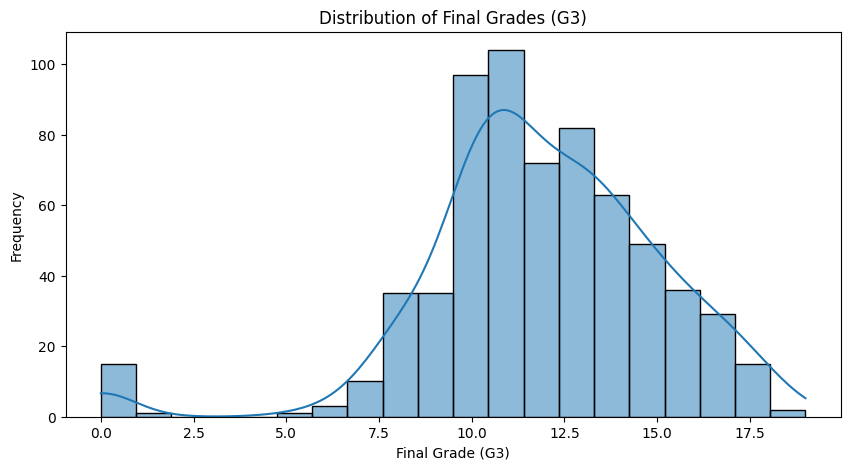

In [14]:
    explore_data(df)

In [15]:
    X_train, X_test, y_train, y_test = prepare_data(df)

In [16]:
    model = build_model(X_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
    history = train_model(model, X_train, y_train)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - loss: 149.8063 - mean_absolute_error: 11.7570 - val_loss: 150.1391 - val_mean_absolute_error: 11.9872
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 139.4583 - mean_absolute_error: 11.4108 - val_loss: 148.1378 - val_mean_absolute_error: 11.9224
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 139.3448 - mean_absolute_error: 11.4693 - val_loss: 145.4038 - val_mean_absolute_error: 11.8279
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 134.7904 - mean_absolute_error: 11.2661 - val_loss: 142.8927 - val_mean_absolute_error: 11.7436
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 133.5770 - mean_absolute_error: 11.3060 - val_loss: 139.7533 - val_mean_absolute_error: 11.6304
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 138.6492 - mean_absolute_error: 11.5154 - val_loss: 136.4242 - val_mean_absolute_error: 11.5042
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 129.6326 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 1.9945 - mean_absolute_error: 0.9786
Test Loss: 2.3317, Test MAE: 1.0074


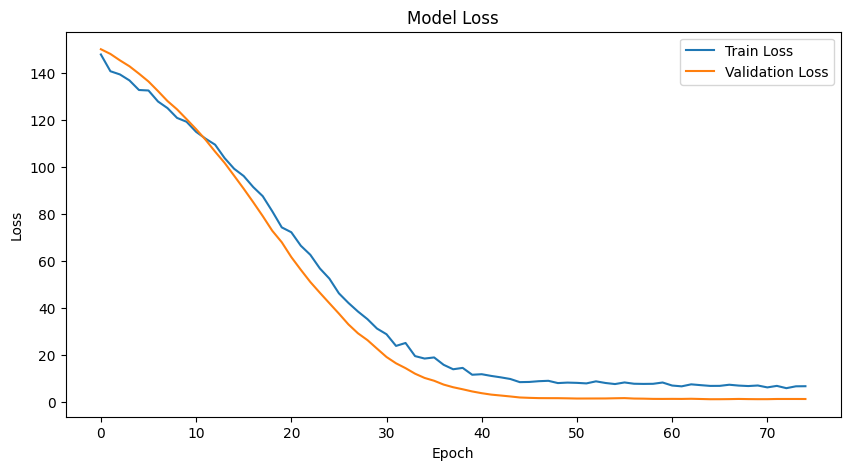

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


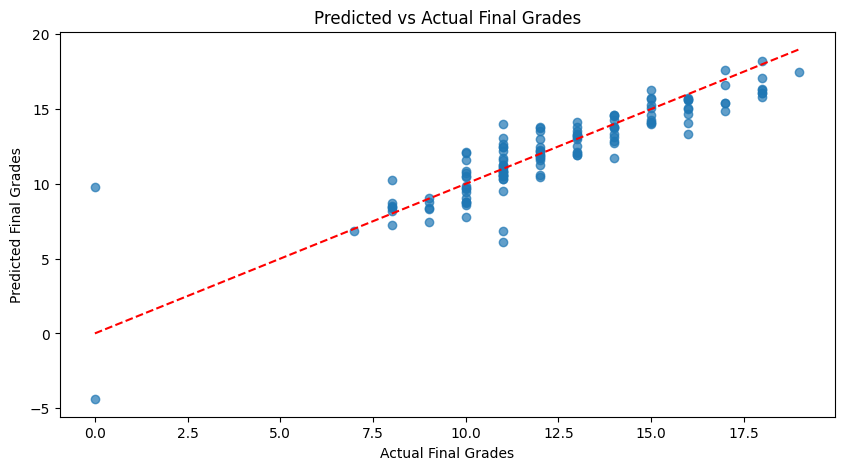

In [18]:
    evaluate_model(model, X_test, y_test, history)